# Submitted By : Rohit

# (17001011046)

In [1]:
# we are importing lib in this cell
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#loading data for pred
data = pd.read_csv('~/Desktop/Housing.csv')
data.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [3]:
data.size

7098

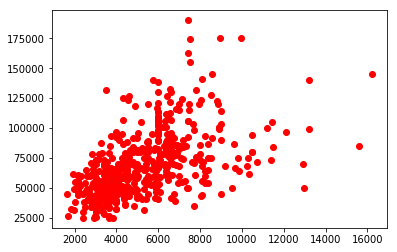

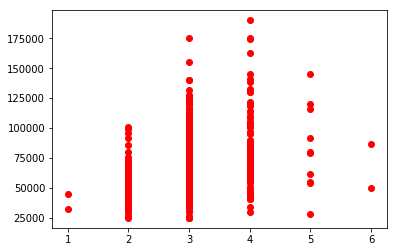

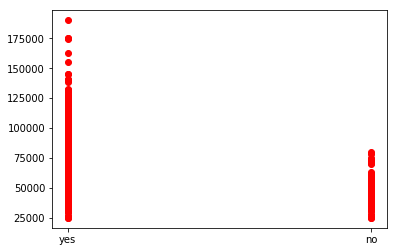

In [4]:
#graph plot of price with lotsize
plt.scatter(data['lotsize'], data['price'], color='red')
plt.show()

#graph plot of price with bedroom
plt.scatter(data['bedrooms'], data['price'], color='red')
plt.show()
 
#graph plot of price with lotsize
plt.scatter(data['driveway'], data['price'], color='red')
plt.show()

## Linear Regression Multiple Variables

In [5]:
data.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [6]:
# for computation we change the yes with 1 and no with 0
data = data.replace(to_replace='yes', value=1, regex=True)
data = data.replace(to_replace='no', value=0, regex=True)

In [7]:
data.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,1,0,1,0,0,1,0
1,2,38500.0,4000,2,1,1,1,0,0,0,0,0,0
2,3,49500.0,3060,3,1,1,1,0,0,0,0,0,0
3,4,60500.0,6650,3,1,2,1,1,0,0,0,0,0
4,5,61000.0,6360,2,1,1,1,0,0,0,0,0,0


In [8]:
#we convert lotsize between o to 5
maxlot = max(data.lotsize) 
minlot = min(data.lotsize)
lotsize_nor =[]
for i in data.lotsize:
    lotsize_nor.append(5*i/maxlot)
lotsize_nor

[1.8055555555555556,
 1.2345679012345678,
 0.9444444444444444,
 2.052469135802469,
 1.962962962962963,
 1.2839506172839505,
 1.1975308641975309,
 1.2839506172839505,
 1.4814814814814814,
 1.6975308641975309,
 2.2222222222222223,
 0.9259259259259259,
 0.5246913580246914,
 0.8888888888888888,
 1.1111111111111112,
 0.9830246913580247,
 1.0185185185185186,
 1.6049382716049383,
 1.0648148148148149,
 1.230246913580247,
 1.4768518518518519,
 1.3919753086419753,
 1.2345679012345678,
 1.2141975308641975,
 1.5308641975308641,
 0.9259259259259259,
 1.1728395061728396,
 1.5308641975308641,
 0.9259259259259259,
 1.3888888888888888,
 1.0802469135802468,
 1.0802469135802468,
 1.2345679012345678,
 1.3888888888888888,
 1.962962962962963,
 1.3888888888888888,
 1.2444444444444445,
 1.595679012345679,
 1.6666666666666667,
 0.9722222222222222,
 1.1558641975308641,
 1.3950617283950617,
 1.4320987654320987,
 2.6481481481481484,
 0.6172839506172839,
 0.6666666666666666,
 0.9382716049382716,
 0.953703703703703

In [9]:
#now after changing lotsize we delete old values
data.drop("lotsize", axis=1, inplace=True)
data.head()

,Unnamed: 0,price,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,3,1,2,1,0,1,0,0,1,0
1,2,38500.0,2,1,1,1,0,0,0,0,0,0
2,3,49500.0,3,1,1,1,0,0,0,0,0,0
3,4,60500.0,3,1,2,1,1,0,0,0,0,0
4,5,61000.0,2,1,1,1,0,0,0,0,0,0


In [10]:
#and now add new lotsize
data.insert(loc=2,column="lotsize",value=lotsize_nor)
data.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,1.805556,3,1,2,1,0,1,0,0,1,0
1,2,38500.0,1.234568,2,1,1,1,0,0,0,0,0,0
2,3,49500.0,0.944444,3,1,1,1,0,0,0,0,0,0
3,4,60500.0,2.052469,3,1,2,1,1,0,0,0,0,0
4,5,61000.0,1.962963,2,1,1,1,0,0,0,0,0,0


In [11]:
X = data[['lotsize','bedrooms','stories','bathrms','bathrms','driveway','recroom',
        'fullbase','gashw','airco','garagepl','prefarea']]
y = data[['price']]

# data divided in train data and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train.head()

,lotsize,bedrooms,stories,bathrms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
311,1.541667,4,1,2,2,1,0,1,0,0,0,0
295,0.983025,2,1,1,1,1,0,0,0,0,2,0
515,1.106173,2,1,1,1,1,0,0,1,0,0,0
58,1.358025,3,2,1,1,1,0,0,0,0,0,0
251,1.086420,2,1,2,2,1,0,1,0,0,0,0


In [12]:
#model for our problem
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)

In [13]:
print('Variance score: %.2f' % r2_score(y_test, predicted))

Variance score: 0.61


# Linear Regression One Variable

In [14]:
data[['lotsize', 'price']].head()

,lotsize,price
0,1.805556,42000.0
1,1.234568,38500.0
2,0.944444,49500.0
3,2.052469,60500.0
4,1.962963,61000.0


In [15]:
x = data[['lotsize']]
y = data[['price']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
y_test.head()

,price
291,39000.0
409,89900.0
460,47600.0
228,68000.0
298,52900.0


In [16]:
# Defining new model to train with only one variable i.e. lotsize
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
#Pred of price
price_pred = model.predict(x_test)

In [18]:
#Calculating R2 Score
print('Variance score: %.2f' % r2_score(y_test, price_pred))

Variance score: 0.29


# Result and Conclulsion

R2 Score when Linear Regression is done with only one variable: 0.61<br>
R2 Score when Linear Regression is done with multiple variables: 0.29
### Conclusion

R2 score is greater when multiple variables are used to train model. However the R2 score in that case is also not very good, reason being availibility of low training data.<br>
Hence it can be concluded that in presence of sufficient training data linear regression with multiple variables may perform better.